# Lesson 3: Subsets and Indexing

- We often need to work with subsets of our data, such as specific rows/columns, or values matching some criteria, in order to:
  - Analyze and/or plot subsets individually
  - Investigate messy and/or suspect data
  - Explore potential outliers
  - Update specific values in our data, such as correcting spelling mistakes or filling missing data

- We've seen a couple of examples of subsets already:
  - Selecting individual columns of a DataFrame
  - Selecting rows of a DataFrame based on some criteria

# Initial Setup

In [ ]:
import pandas as pd

%matplotlib inline

# Selection Methods

When working with Python objects such as lists or dictionaries, we can use square brackets `[]` as an **indexing operator** to select item(s) within the object, for example:
- `first_five = my_list[:5]`
- `vancouver_population = populations_dict['Vancouver']`

With `pandas` DataFrames and Series, we still use the indexing operator to select subsets, but it can be applied in many different ways
- `pandas` provides very flexible and powerful options for selecting subsets...
- ... but keeping track of them all can get confusing!

There are three main ways of selecting subsets of a DataFrame (or Series):
<ol>
    <li>Using only square brackets `[]`</li>
    <li>Positional indexing with `.iloc[]`</li>
    <li>Label-based indexing with `.loc[]`</li>
</ol>

We've already used the first approach in the previous lessons. Let's review and then discuss the other two options.
- We'll focus on DataFrames here, but the concepts and syntax are similar for Series

# Square Brackets Only

With this option, we can select a subset of a DataFrame's rows **or** a subset of a DataFrame's columns, but we can't select both rows and columns at once
- `pandas` will figure out from the context whether you're selecting rows or columns
- The types of subsets we can select with this approach are quite limited, but it's a handy shortcut for some very common types of subsets

Let's return to the weather data from Lesson 2 and work with the aggregated station mean values:

In [3]:
weather_all = pd.read_csv('data/weather_airports_24hr_snapshot.csv')
weather_mean = weather_all.groupby('Station Name').mean()
weather_mean.head()

,Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,,,,,,
CALGARY,18.054167,4.708333,43.875000,172.083333,10.625000,45.9375,88.990833,25.0,NaN
CHARLOTTETOWN,8.637500,0.058333,59.666667,212.916667,12.500000,24.1000,101.363750,NaN,-3.0
EDMONTON,17.558333,5.037500,48.791667,208.333333,8.083333,24.1000,92.950833,26.0,NaN
FREDERICTON,12.373913,0.086957,48.608696,247.222222,14.043478,16.1000,101.679565,NaN,NaN
HALIFAX,12.237500,-1.416667,40.041667,178.333333,15.500000,24.1000,100.328333,NaN,NaN


## a) Row Subsets with Boolean Series

As we saw in the previous lesson, we can select a subset of a DataFrame's rows by filtering with a Boolean Series:

In [4]:
windy = weather_mean['Wind Spd (km/h)'] > 20
weather_mean[windy]

,Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,,,,,,
IQALUIT,-5.350000,-8.695833,77.625000,329.583333,29.625000,23.670833,100.540417,NaN,-13.125
ST. JOHN'S,4.862500,0.850000,75.916667,195.000000,23.625000,24.100000,99.532500,NaN,NaN
WHITEHORSE,9.183333,0.533333,57.125000,162.916667,20.333333,57.683333,92.225000,NaN,NaN
YELLOWKNIFE,15.400000,3.008333,45.041667,158.750000,20.041667,24.100000,98.066667,NaN,NaN


This subset contains all of the columns of `weather_mean`, but only the rows for which the value of the Series `windy` is `True`

## b) Column Subsets

### Single Columns

Use a column's name within square brackets to select a specific column of a DataFrame:

In [5]:
weather_mean['Temp (deg C)']

Station Name
CALGARY          18.054167
CHARLOTTETOWN     8.637500
EDMONTON         17.558333
FREDERICTON      12.373913
HALIFAX          12.237500
IQALUIT          -5.350000
MONTREAL         17.479167
OTTAWA           15.537500
PRINCE GEORGE    14.337500
QUEBEC           15.366667
REGINA           21.337500
SASKATOON        19.308333
ST. JOHN'S        4.862500
THUNDER BAY      14.625000
TORONTO          14.833333
VANCOUVER        15.262500
VICTORIA         15.658333
WHITEHORSE        9.183333
WINNIPEG         20.495833
YELLOWKNIFE      15.400000
Name: Temp (deg C), dtype: float64

This subset contains all the rows of `weather_mean`, but only the one column we specified.

### Multiple Columns

We can also select several columns, in whatever order we like, using a list of column names:

In [6]:
weather_mean[['Rel Hum (%)', 'Pressure (kPa)', 'Temp (deg C)']]

,Rel Hum (%),Pressure (kPa),Temp (deg C)
Station Name,,,
CALGARY,43.875000,88.990833,18.054167
CHARLOTTETOWN,59.666667,101.363750,8.637500
EDMONTON,48.791667,92.950833,17.558333
FREDERICTON,48.608696,101.679565,12.373913
HALIFAX,40.041667,100.328333,12.237500
IQALUIT,77.625000,100.540417,-5.350000
MONTREAL,56.958333,101.318750,17.479167
OTTAWA,68.541667,100.387500,15.537500
PRINCE GEORGE,62.291667,93.307083,14.337500


We can use a subset to plot specific columns of our data:

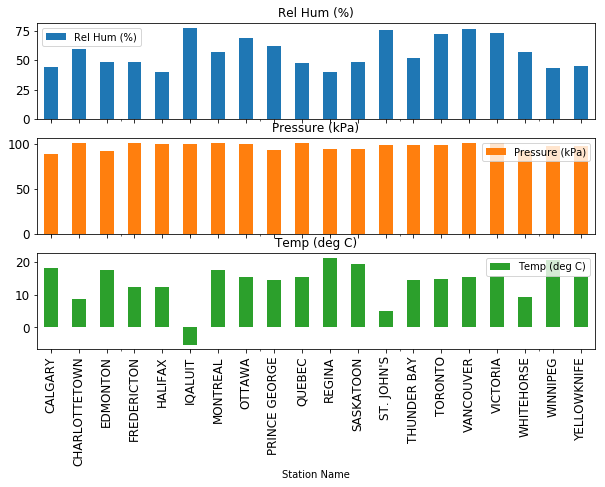

In [60]:
weather_subset = weather_mean[['Rel Hum (%)', 'Pressure (kPa)', 'Temp (deg C)']]
weather_subset.plot(kind='bar', subplots=True, figsize=(10, 6), fontsize='large');

### Interlude: Forgetting the Double Square Brackets

What happens if we try to use a single pair of square brackets to select multiple columns from a DataFrame?
- This is a very easy mistake to make, especially when you're coding on the fly in Jupyter!

In [ ]:
#weather_mean['Rel Hum (%)', 'Temp (deg C)']

- *Uncomment the code above to run it and raise the error*
- *The error message will look like the one displayed below (the `%%capture` magic command in the cell is a way to display this error message without having the error halt notebook execution partway through when using "Run All Cells"*)

In [ ]:
%%capture

weather_mean['Rel Hum (%)', 'Temp (deg C)']

- We get an error &mdash; `KeyError: ('Rel Hum (%)', 'Temp (deg C)')`
- If we don't explicitly define a list by enclosing the column names in a second set of square brackets within the outer square brackets, `pandas` assumes that the comma-separated items are a tuple: `('Rel Hum (%)', 'Temp (deg C)')`
- Since column labels can be any type of object, not just strings, a tuple can actually be a column label
- So `pandas` looks for a column whose label is the tuple `('Rel Hum (%)', 'Temp (deg C)')`, can't find it, and throws a `KeyError` exception

---

### Interlude: Single Column as a DataFrame

When we use a column name to select a single column from a DataFrame, the object that is returned is a Series:

In [ ]:
temp = weather_mean['Temp (deg C)']
temp.head()

Sometimes, it's useful to have the column as a DataFrame instead of a Series. An easy way to this is with double square brackets, i.e. indexing with a list containing a single item (the column name), instead of indexing with the column name directly:

In [ ]:
temp_df = weather_mean[['Temp (deg C)']]
temp_df.head()

One of the differences between the DataFrame and Series data structures is the behaviour of the `plot` convenience method. For example, here's how `plot` creates a bar chart of the Series `temp`:

In [ ]:
temp.plot(kind='bar', figsize=(10, 3));

Compare with the equivalent plot, for exactly the same data, using the `temp_df` DataFrame:

In [ ]:
temp_df.plot(kind='bar', figsize=(10, 3));

Unlike the Series bar chart, the DataFrame bar chart has all the bars the same colour, and includes a useful legend with the label `'Temp (deg C)'`.

---

# Mini-Recap

Selecting subsets with just the indexing operator `[]`

|||
---|----
Use a Boolean Series to select rows matching some criteria | `df[bool_series]`
Use a list of column names to select several columns in a specified order | `df[['E', 'A', 'C']]`
Select a single column (as a Series) | `series_A = df['A']`
Select a single column (as a DataFrame) | `df_A = df[['A']]`


- Using just the indexing operator `[]` is a handy shortcut for some very common subsets
- However, it is fairly limited &mdash; for example, we can't select both rows AND columns at once
- For more complex subsets, we can use `.iloc[]` or `.loc[]`, as we shall see shortly

- If we want to change the values in a subset of data, we can sometimes do this with just square brackets, but it gets quite dicey
  - Except for very simple assignments (like updating a single column), it's safer to use the more robust `.iloc[]` or `.loc[]` to change values in a DataFrame, otherwise we'll very quickly run into ominous warnings, errors, and unexpected behaviour

For example, let's try setting a couple of columns to 0:

In [10]:
weather_mean[['Wind Dir (deg)', 'Wind Spd (km/h)']] = 0
weather_mean.head()

,Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,,,,,,
CALGARY,18.054167,4.708333,43.875000,0.0,0.0,45.9375,88.990833,25.0,NaN
CHARLOTTETOWN,8.637500,0.058333,59.666667,0.0,0.0,24.1000,101.363750,NaN,-3.0
EDMONTON,17.558333,5.037500,48.791667,0.0,0.0,24.1000,92.950833,26.0,NaN
FREDERICTON,12.373913,0.086957,48.608696,0.0,0.0,16.1000,101.679565,NaN,NaN
HALIFAX,12.237500,-1.416667,40.041667,0.0,0.0,24.1000,100.328333,NaN,NaN


That worked ok, but what if we want to do something more complex?

Let's try extracting the subset of rows with relative humidity < 50% and set the pressure values to 0:

In [16]:
low_rh = weather_mean['Rel Hum (%)'] < 50
weather_low_rh = weather_mean[low_rh]
weather_low_rh

,Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,,,,,,
CALGARY,18.1,4.708333,43.9,0.0,0.0,45.937500,88.990833,25.000000,NaN
EDMONTON,17.6,5.037500,48.8,0.0,0.0,24.100000,92.950833,26.000000,NaN
FREDERICTON,12.4,0.086957,48.6,0.0,0.0,16.100000,101.679565,NaN,NaN
HALIFAX,12.2,-1.416667,40.0,0.0,0.0,24.100000,100.328333,NaN,NaN
QUEBEC,15.4,3.875000,47.7,0.0,0.0,38.887500,100.810833,25.750000,NaN
REGINA,21.3,6.279167,40.0,0.0,0.0,24.100000,94.327500,26.777778,NaN
SASKATOON,19.3,6.845833,48.7,0.0,0.0,23.900000,95.211667,26.333333,NaN
WINNIPEG,20.5,5.929167,43.2,0.0,0.0,23.033333,98.481250,27.666667,NaN
YELLOWKNIFE,15.4,3.008333,45.0,0.0,0.0,24.100000,98.066667,NaN,NaN


In [24]:
weather_low_rh['Pressure (kPa)'] = 0
weather_low_rh

C:\Users\jenfl\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,,,,,,
CALGARY,18.1,4.708333,43.9,0.0,0.0,45.937500,0,25.000000,NaN
EDMONTON,17.6,5.037500,48.8,0.0,0.0,24.100000,0,26.000000,NaN
FREDERICTON,12.4,0.086957,48.6,0.0,0.0,16.100000,0,NaN,NaN
HALIFAX,12.2,-1.416667,40.0,0.0,0.0,24.100000,0,NaN,NaN
QUEBEC,15.4,3.875000,47.7,0.0,0.0,38.887500,0,25.750000,NaN
REGINA,21.3,6.279167,40.0,0.0,0.0,24.100000,0,26.777778,NaN
SASKATOON,19.3,6.845833,48.7,0.0,0.0,23.900000,0,26.333333,NaN
WINNIPEG,20.5,5.929167,43.2,0.0,0.0,23.033333,0,27.666667,NaN
YELLOWKNIFE,15.4,3.008333,45.0,0.0,0.0,24.100000,0,NaN,NaN


- The assignment succeeded (pressure values were changed in `weather_low_rh`) but we get an ominous `SettingWithCopyWarning`
- What happens if we try to make a similar change to the values in the original DataFrame `weather_mean`?

In [30]:
weather_mean[low_rh]['Pressure (kPa)'] = 0
weather_mean

C:\Users\jenfl\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,,,,,,
CALGARY,0,4.708333,43.9,0.0,0.0,45.937500,88.990833,25.000000,NaN
CHARLOTTETOWN,0,0.058333,59.7,0.0,0.0,24.100000,101.363750,NaN,-3.000
EDMONTON,0,5.037500,48.8,0.0,0.0,24.100000,92.950833,26.000000,NaN
FREDERICTON,0,0.086957,48.6,0.0,0.0,16.100000,101.679565,NaN,NaN
HALIFAX,0,-1.416667,40.0,0.0,0.0,24.100000,100.328333,NaN,NaN
IQALUIT,0,-8.695833,77.6,0.0,0.0,23.670833,100.540417,NaN,-13.125
MONTREAL,0,8.550000,57.0,0.0,0.0,29.141667,101.318750,NaN,NaN
OTTAWA,0,9.516667,68.5,0.0,0.0,23.766667,100.387500,NaN,NaN
PRINCE GEORGE,0,5.883333,62.3,0.0,0.0,15.900000,93.307083,25.000000,NaN


- There's that `SettingWithCopyWarning` again!
- And this time, the assignment failed&mdash;none of the values in the `'Pressure (kPa)'` column were changed

The reasons for all this weirdness include:
- Chained indexing
- Working with views vs. copies of data
- The ambiguity associated with modifying a subset of data
  - If you have some data `df` and another variable `df_subset` containing a subset of `df`, when you change values in `df_subset` do you want those values also changed in the original data `df`, or not?
  - `pandas` tries to warn you of this ambiguity, but the exact behaviour (error or warning, assignment failed or succeeded) will change depending on the specific syntax you use

Changing values in subsets of `pandas` data is quite a complicated topic, which we won't have time to get into here
- Using the more robust `.iloc[]` or `.loc[]` instead of just `[]` helps the situation somewhat, since you can select rows and columns simultaneously, but the issues listed above still remain and must be handled carefully
- For a lot more detail on these topics check out:
  - [Understanding SettingWithCopy Warning in Pandas](https://www.dataquest.io/blog/settingwithcopywarning/)
  - [Selecting Subsets of Data in Pandas: Parts 1-3](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c)
  - [Selecting Subsets of Data in Pandas: Part 4](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-part-4-c4216f84d388)

# Anatomy of a DataFrame

Before we dive into `iloc` and `loc`, let's take a closer look at how data is organized in our DataFrame `weather_mean`.

![dataframe1](img/dataframe1.png)

In this diagram (showing the first 5 rows of `weather_mean`):
- The column labels are shaded in green
- The index is shaded in blue &mdash; it provides labels for each row
  - The first row of `weather_mean` is labelled `'CALGARY'`
  - The second row is labelled `'CHARLOTTETOWN'`
  - And so on for each of the following rows
- The actual data is the white area outlined in red

The column labels and index are **metadata**&mdash;they give us information about the data.

The underlying data (without the metadata) is an array which we can access with the `values` attribute:

In [31]:
weather_mean.values

array([[ 0.00000000e+00,  4.70833333e+00,  4.39000000e+01,
         0.00000000e+00,  0.00000000e+00,  4.59375000e+01,
         8.89908333e+01,  2.50000000e+01,             nan],
       [ 0.00000000e+00,  5.83333333e-02,  5.97000000e+01,
         0.00000000e+00,  0.00000000e+00,  2.41000000e+01,
         1.01363750e+02,             nan, -3.00000000e+00],
       [ 0.00000000e+00,  5.03750000e+00,  4.88000000e+01,
         0.00000000e+00,  0.00000000e+00,  2.41000000e+01,
         9.29508333e+01,  2.60000000e+01,             nan],
       [ 0.00000000e+00,  8.69565217e-02,  4.86000000e+01,
         0.00000000e+00,  0.00000000e+00,  1.61000000e+01,
         1.01679565e+02,             nan,             nan],
       [ 0.00000000e+00, -1.41666667e+00,  4.00000000e+01,
         0.00000000e+00,  0.00000000e+00,  2.41000000e+01,
         1.00328333e+02,             nan,             nan],
       [ 0.00000000e+00, -8.69583333e+00,  7.76000000e+01,
         0.00000000e+00,  0.00000000e+00,  2.367083

We can access the metadata with the `columns` and `index` attributes:

In [32]:
weather_mean.columns

Index(['Temp (deg C)', 'Dew Point Temp (deg C)', 'Rel Hum (%)',
       'Wind Dir (deg)', 'Wind Spd (km/h)', 'Visibility (km)',
       'Pressure (kPa)', 'Hmdx', 'Wind Chill'],
      dtype='object')

In [33]:
weather_mean.index

Index(['CALGARY', 'CHARLOTTETOWN', 'EDMONTON', 'FREDERICTON', 'HALIFAX',
       'IQALUIT', 'MONTREAL', 'OTTAWA', 'PRINCE GEORGE', 'QUEBEC', 'REGINA',
       'SASKATOON', 'ST. JOHN'S', 'THUNDER BAY', 'TORONTO', 'VANCOUVER',
       'VICTORIA', 'WHITEHORSE', 'WINNIPEG', 'YELLOWKNIFE'],
      dtype='object', name='Station Name')

This index of station names was created auto-magically when we aggregated with `weather_mean = weather_all.groupby('Station Name').mean()`

In the original hourly data `weather_all`, which we read from a CSV file, the index is just a range of integers corresponding to the row numbers:

In [34]:
weather_all.head(3)

,Datetime (Local Standard),Station ID,Station Name,Timezone,Datetime (UTC),Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill,Conditions
0,2018-05-21 17:00:00,YYC,CALGARY,MST,2018-05-22 00:00:00,23.0,2.3,25.0,100.0,13.0,48.3,88.74,NaN,NaN,Mainly Clear
1,2018-05-21 18:00:00,YYC,CALGARY,MST,2018-05-22 01:00:00,22.7,3.2,27.0,100.0,10.0,48.3,88.75,NaN,NaN,Mainly Clear
2,2018-05-21 19:00:00,YYC,CALGARY,MST,2018-05-22 02:00:00,19.5,5.2,39.0,80.0,10.0,64.4,88.76,NaN,NaN,Mainly Clear


In [35]:
weather_all.index

RangeIndex(start=0, stop=480, step=1)

If we wanted a more meaningful index for `weather_all`, we could:
- Use the `set_index` method to transform one of the columns into the DataFrame's index, or 
- Set the index from the beginning by using the `index_col` keyword argument of `pd.read_csv` when reading from the CSV file
- We'll see later why it can be useful to have an index that isn't just the default of row numbers

# Row and Column Positions

Unlike a list, which is 1-dimensional, DataFrames are 2-dimensional:
- The rows are the first dimension
- The columns are the second dimension

We've seen this with the `shape` attribute, which is a tuple with the number of rows first, followed by the number of columns.

In [36]:
weather_mean.shape

(20, 9)

Just as the positions of items in a Python list are counted with integers starting at 0, so are the rows and columns of a DataFrame:

![dataframe2](img/dataframe2.png)

Note: The DataFrame's column labels (green shaded area) are not counted as a row, and the index (blue shaded area) is not counted as a column.

# Positions and Labels

Each individual cell in a DataFrame, such as the yellow one highlighted below, is associated with:
- A row position and column position, and
- A row label and column label

![dataframe3](img/dataframe3.png)

To select data in a DataFrame with `iloc` or `loc`, we specify the **row(s) first, followed by the column(s)**

- With **positional indexing**, we use the `iloc` attribute (you can think of it as "integer location") followed by square brackets containing the row position(s) followed by column position(s)
- For example, we can use the row number and column number to select the yellow cell from the above diagram:

In [39]:
# Position: row 1, column 4
weather_mean.iloc[1, 4]

12.5

- With **label-based indexing**, we use the `loc` attribute followed by square brackets containing the row label(s) followed by the column label(s)
- For example, we use the row label and column label to select the yellow cell:

In [40]:
# Labels - row: 'CHARLOTTETOWN', column: 'Wind Spd (km/h)'
weather_mean.loc['CHARLOTTETOWN', 'Wind Spd (km/h)']

12.5

- Label-based indexing can be really handy because it allows us to use our DataFrame as a **lookup table**, as in the example above
- If we don't know or care about the row and column number of the data of interest, we can use labels to look up the value
  - To find out the wind speed in Charlottetown, we just specify the labels `'CHARLOTTETOWN'` and `'Wind Spd (km/h)'`

# Exercise 3.1

a) Select the cell in row 2, column 6 of `weather_mean` using `iloc`

b) Same as a) but using `loc`

c) Use `iloc` to select the cell in `weather_mean` containing the value of the relative humidity in Halifax.

d) Select the same cell as in c) but using `loc`

# Positional Indexing

With Python lists, we can use positional indexing to select:
- A single item at a specified position, or
- A slice `start:stop:step`

In [41]:
animals = ['cat', 'dog', 'elephant', 'duck', 'hamster', 'sheep', 'parrot']

# Print item 0
print(animals[0])

# Print items in the slice 2:5 (i.e. items 2, 3, 4)
print(animals[2:5])

# Print alternating items starting from position 0
print(animals[::2])

cat
['elephant', 'duck', 'hamster']
['cat', 'elephant', 'hamster', 'parrot']


We can do the same for rows and columns of a DataFrame with `iloc`.

- Single row and single column, as we saw earlier:

In [49]:
weather_mean.iloc[2, 6]

92.95083333333334

- Slice of rows and a slice of columns:

In [44]:
weather_mean.iloc[4:8, 5:]

,Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,
HALIFAX,24.100000,100.328333,NaN,NaN
IQALUIT,23.670833,100.540417,NaN,-13.125
MONTREAL,29.141667,101.318750,NaN,NaN
OTTAWA,23.766667,100.387500,NaN,NaN


- As with list slicing, slices with `iloc` are **inclusive** of the start bound but **exclusive** of the stop bound
  - Row slice `4:8` is from row 4 up to, but not including row 8
- Also as with list slicing, the start or stop bound can be omitted
  - Column slice `5:` goes from column 5 to the end
  - A slice `:3` would go from position 0 to position 2
- The slice `:` (no start or stop bound) will select all rows or columns

- All rows and a slice of several columns:

In [45]:
weather_mean.iloc[:, 2:5]

,Rel Hum (%),Wind Dir (deg),Wind Spd (km/h)
Station Name,,,
CALGARY,43.875000,172.083333,10.625000
CHARLOTTETOWN,59.666667,212.916667,12.500000
EDMONTON,48.791667,208.333333,8.083333
FREDERICTON,48.608696,247.222222,14.043478
HALIFAX,40.041667,178.333333,15.500000
IQALUIT,77.625000,329.583333,29.625000
MONTREAL,56.958333,195.000000,11.791667
OTTAWA,68.541667,194.583333,8.500000
PRINCE GEORGE,62.291667,141.538462,5.791667


- Several rows and all columns:

In [46]:
weather_mean.iloc[5:15:3, :]

,Temp (deg C),Dew Point Temp (deg C),Rel Hum (%),Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa),Hmdx,Wind Chill
Station Name,,,,,,,,,
IQALUIT,-5.350000,-8.695833,77.625000,329.583333,29.625000,23.670833,100.540417,NaN,-13.125
PRINCE GEORGE,14.337500,5.883333,62.291667,141.538462,5.791667,15.900000,93.307083,25.000000,NaN
SASKATOON,19.308333,6.845833,48.708333,185.833333,12.208333,23.900000,95.211667,26.333333,NaN
TORONTO,14.833333,9.045833,72.458333,118.333333,6.708333,13.229167,99.551250,NaN,NaN


- Slice of several rows and one column:

In [47]:
weather_mean.iloc[5:15:3, 0]

Station Name
IQALUIT          -5.350000
PRINCE GEORGE    14.337500
SASKATOON        19.308333
TORONTO          14.833333
Name: Temp (deg C), dtype: float64

---
### Interlude: Shortcut for Row Selection

When selecting entire rows, we can omit the `:` comma slice
- The following two are equivalent:
  - `weather_mean.iloc[start:stop:step, :]`
  - `weather_mean.iloc[start:stop:step]`

In [ ]:
weather_mean.iloc[4:8]

However, we can't omit the `:` row slice when selecting columns with `iloc`. This is because selection with `iloc` always specifies rows first, followed (optionally) by columns.

---

Something we can do with `iloc` that we can't do with Python lists is select multiple items in any arbitrary order.
- We do this by using a list inside the indexing operator
- For example, select rows 4 and 2 (in that order), and slice 3:7 of columns:

In [48]:
weather_mean.iloc[[4, 2], 3:7]

,Wind Dir (deg),Wind Spd (km/h),Visibility (km),Pressure (kPa)
Station Name,,,,
HALIFAX,178.333333,15.500000,24.1,100.328333
EDMONTON,208.333333,8.083333,24.1,92.950833


- Select rows 4 and 2, and columns 6, 4, 5:

In [50]:
weather_mean.iloc[[4, 2], [6, 4, 5]]

,Pressure (kPa),Wind Spd (km/h),Visibility (km)
Station Name,,,
HALIFAX,100.328333,15.500000,24.1
EDMONTON,92.950833,8.083333,24.1


# Exercise 3.2

a) Use `iloc` to select rows 15 to end and the first 3 columns of `weather_mean`

b) Use `iloc` to select the every fourth row (starting from 0) and columns 4, 3, and 0 of weather_mean

# Label-Based Indexing

Similar to `iloc`, label-based indexing with `loc` allows us to select:
- A single cell
- A single row and/or column
- Slices of rows and/or columns
- Multiple rows and/or columns in arbitrary order

We can also select rows or columns with a Boolean Series, and mix and match this with the above selection methods.

However, `loc` has a few important caveats and differences from `iloc`, as we shall see shortly.

- Single row and column:

In [51]:
weather_mean.loc['HALIFAX', 'Rel Hum (%)']

40.041666666666664

- Slice of rows and slice of columns:

In [52]:
weather_mean.loc['HALIFAX':'OTTAWA', 'Rel Hum (%)':'Wind Spd (km/h)']

,Rel Hum (%),Wind Dir (deg),Wind Spd (km/h)
Station Name,,,
HALIFAX,40.041667,178.333333,15.500000
IQALUIT,77.625000,329.583333,29.625000
MONTREAL,56.958333,195.000000,11.791667
OTTAWA,68.541667,194.583333,8.500000


Can you spot the difference compared to slicing with `iloc`?

- Label-based slicing with `loc` is **inclusive** of **both** the start bound **and** the stop bound!
- There are [practical reasons](https://pandas.pydata.org/pandas-docs/stable/advanced.html#endpoints-are-inclusive) why this design decision was made, but we won't get into the details for now
- It's important to keep this difference in mind when slicing with labels

- Slice of rows from Halifax to Ottawa, with the pressure and temperature columns, in that order:

In [53]:
weather_mean.loc['HALIFAX':'Ottawa', ['Pressure (kPa)', 'Temp (deg C)']]

,Pressure (kPa),Temp (deg C)
Station Name,,
HALIFAX,100.328333,12.237500
IQALUIT,100.540417,-5.350000
MONTREAL,101.318750,17.479167
OTTAWA,100.387500,15.537500


- Select rows with a Boolean Series and columns with a list:

In [54]:
chilly = weather_mean['Temp (deg C)'] < 10
weather_mean.loc[chilly, ['Pressure (kPa)', 'Temp (deg C)']]

,Pressure (kPa),Temp (deg C)
Station Name,,
CHARLOTTETOWN,101.363750,8.637500
IQALUIT,100.540417,-5.350000
ST. JOHN'S,99.532500,4.862500
WHITEHORSE,92.225000,9.183333


# Exercise 3.3

a) Use `loc` to select the wind speed and wind direction in Toronto, Montreal, and Ottawa

b) Use `loc` to select rows where the relative humidity is less than 50%, and a column slice from `'Temp (deg C)'` through `'Rel Hum (%)'` (inclusive)

---

### Interlude: Non-Unique Labels

Another important difference of label-based indexing compared to positional indexing is that unlike integer positions, labels do not need to be unique.
- A single label with `loc` can select multiple rows or columns

For example, let's revisit the girls baby names data from Exercise 2.2:

In [61]:
girls = pd.read_csv('data/bc-popular-girls-names.csv')
girls.head()

,Name,Year,Count,Fraction
0,AALIYAH,2000,6,0.000433
1,AALIYAH,2001,13,0.000948
2,AALIYAH,2002,17,0.001271
3,AALIYAH,2003,23,0.001700
4,AALIYAH,2004,22,0.001644


We could use a filter to select all the rows for a specific name:

In [62]:
name_filter = girls['Name'] == 'FATIMA'
girls[name_filter]

,Name,Year,Count,Fraction
14039,FATIMA,1993,6,0.000356
14040,FATIMA,1995,5,0.000302
14041,FATIMA,1997,8,0.000510
14042,FATIMA,2000,10,0.000722
14043,FATIMA,2001,9,0.000656
14044,FATIMA,2002,6,0.000449
14045,FATIMA,2003,5,0.000369
14046,FATIMA,2004,5,0.000374
14047,FATIMA,2006,6,0.000435
14048,FATIMA,2007,5,0.000351


Or we can set the `'Name'` column as the index...

In [63]:
girls_by_name = girls.set_index('Name')
girls_by_name.head()

,Year,Count,Fraction
Name,,,
AALIYAH,2000,6,0.000433
AALIYAH,2001,13,0.000948
AALIYAH,2002,17,0.001271
AALIYAH,2003,23,0.001700
AALIYAH,2004,22,0.001644


... and use label-based indexing to select all the rows for a specific name:

In [64]:
girls_by_name.loc['FATIMA', :]

,Year,Count,Fraction
Name,,,
FATIMA,1993,6,0.000356
FATIMA,1995,5,0.000302
FATIMA,1997,8,0.000510
FATIMA,2000,10,0.000722
FATIMA,2001,9,0.000656
FATIMA,2002,6,0.000449
FATIMA,2003,5,0.000369
FATIMA,2004,5,0.000374
FATIMA,2006,6,0.000435


... or several names:

In [65]:
girls_by_name.loc[['PRIYANKA', 'HARJIT', 'KEIKO', 'NATALYA'], :]

,Year,Count,Fraction
Name,,,
PRIYANKA,1991,5,0.000294
PRIYANKA,1996,5,0.000308
PRIYANKA,1998,5,0.000332
PRIYANKA,2005,6,0.000439
HARJIT,1974,5,0.000369
HARJIT,1975,7,0.000502
HARJIT,1976,7,0.000519
HARJIT,1977,6,0.000436
HARJIT,1978,5,0.000353


---

### Interlude: Other Details and Caveats

Slicing with labels can get tricky when labels aren't unique.

Sometimes it works, if labels are sorted in a way that the slice is well-defined:

In [ ]:
girls_by_name.loc['HARJIT':'HARKIRAN']

But other times, the slice is not defined an raises and error, for example if we shuffle the order of names in `girls_by_name` by sorting the DataFrame by year:

In [ ]:
girls_shuffled = girls_by_name.sort_values('Year')
girls_shuffled.head()

Now the same slice raises an error:

In [ ]:
%%capture

girls_shuffled.loc['HARJIT':'HARKIRAN']

#### Other Selection Methods

We've covered most, but not all of the available methods for selecting data in `pandas`. The approaches we've covered here are (in my opinion) most important ones. Other, more obscure options, tend to be very ambiguous and confusing, and `pandas` has gradually been phasing out many of them (such as the `ix` indexing operator, now deprecated).

For example, you can use square brackets without `iloc` to select a slice of DataFrame rows by position:

However, this same approach does **not** work to select a single row by position:

In [ ]:
%%capture

weather_mean[10]

---

# Lesson 3 Recap

### Anatomy of a DataFrame

![dataframe3](img/dataframe3.png)

- Each cell in a DataFrame is associated with:
  - A row position and column position (integers, starting from 0), and
  - A row label and column label
- Row and column labels are part of the DataFrame's metadata, stored in attributes:
  - `df.index` contains the labels for the DataFrame's rows
  - `df.columns` contains the labels for the DataFrame's columns
- `df.values` contains the underlying data array

### Selection Methods

There are three main ways of selecting subsets of a DataFrame (or Series):
<ol>
    <li>Using only square brackets `[]`</li>
    <li>Positional indexing with `.iloc[]`</li>
    <li>Label-based indexing with `.loc[]`</li>
</ol>


#### 1. Using only square brackets
|||
---|----
Use a Boolean Series to select rows matching some criteria | `df[bool_series]`
Use a list of column names to select several columns in a specified order | `df[['E', 'A', 'C']]`
Select a single column (as a Series) | `series_A = df['A']`
Select a single column (as a DataFrame) | `df_A = df[['A']]`


#### 2. Positional indexing with `iloc`

With `iloc`, we specify the row selection first, followed by column selection, separated by a comma. For example, selecting a single cell at row 10, column 3:
```
df.iloc[10, 3]
```

With `iloc` can select:
- A single cell
- A single row or column
- Slices of rows and/or columns
  - As with Python lists, `iloc` slices are inclusive of the start bound and exclusive of the stop bound
- Multiple rows and/or columns in arbitrary order, using a list of positions

Example&mdash;every second row from 100 up to and including 200, and columns 5, 2, 4 in that order:
```
df.iloc[100:201:2, [5, 2, 4]]
```


#### 3. Label-based indexing with `loc`

As with `iloc`, we specify the row selection first, followed by column selection, separated by a comma, but using the row and column labels instead of their positions. For example, selecting a single cell at a row labelled `'HALIFAX'` and a column labelled `'Temp (deg C)'`:
```
weather.loc['HALIFAX', 'Temp (deg C)']
```

Similar to `iloc`, with `loc` we can select:
- A single cell
- A single row or column
- Slices of rows and/or columns
  - However, unlike `iloc` and Python list slicing, `loc` slices are inclusive of the start bound but also **inclusive** of the stop bound 
- Multiple rows and/or columns in arbitrary order, using a list of labels

We can also select rows and/or columns with a Boolean Series, and mix and match these with the other selection options listed above.

Example&mdash;select rows where temperature > 25 and a slice of columns from `'Rel Hum (%)'` up to and including `'Pressure (kPa)'`:
```
warm = weather['Temp (deg C)'] > 25
df = weather.loc[warm, 'Rel Hum (%)':'Pressure (kPa)']
```

# Where to go from here?

### Online resources and courses

- Data Carpentry: http://www.datacarpentry.org/python-ecology-lesson/
- Dataquest: https://www.dataquest.io/
  - Excellent blog with great tutorials and articles: https://www.dataquest.io/blog/
- Data Camp: https://www.datacamp.com/courses/intro-to-python-for-data-science
- Kaggle: https://www.kaggle.com/learn/overview
  - Many more example Jupyter notebooks and tutorials: https://www.kaggle.com/kernels
  - Tons of datasets to play with: https://www.kaggle.com/datasets

### The `pandas` book

Python for Data Analysis, by Wes McKinney. All data and code from the book is at https://github.com/wesm/pydata-book

### Data visualization resources

- The Python Visualization Landscape: https://www.youtube.com/watch?v=FytuB8nFHPQ
- Data to Viz: https://www.data-to-viz.com/
- pandas: https://pandas.pydata.org/pandas-docs/stable/visualization.html
- matplotlib: https://matplotlib.org/gallery/index.html
- seaborn: https://seaborn.pydata.org/examples/index.html
- Interactive plots:
  - plotly:  https://plot.ly/python/
  - bokeh:  https://bokeh.pydata.org/en/latest/docs/gallery.html
- Maps:
  - plotly: https://plot.ly/python/#maps
  - cartopy:  https://scitools.org.uk/cartopy/docs/v0.15/gallery.html
  - folium:  http://folium.readthedocs.io/en/latest/

### Other inspiration and ideas

- PyData 101 – Jake VanderPlas: https://www.youtube.com/watch?v=DifMYH3iuFw
- Reproducible Data Analysis in Jupyter – Jake VanderPlas: http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/
- Project Jupyter: From Interactive Python to Open Science - Fernando Perez: https://www.youtube.com/watch?v=xuNj5paMuow
- The Next Generation of Data Products – Hilary Mason: https://www.youtube.com/watch?v=OuRINNSDtlM

# Thank You!